Accuracy: 98.33%
Precision: 98.42%
Recall: 98.33%
F1 Score: 98.33%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
Predicted   0   1   2
Actual               
0          23   0   0
1           0  19   0
2           0   1  17


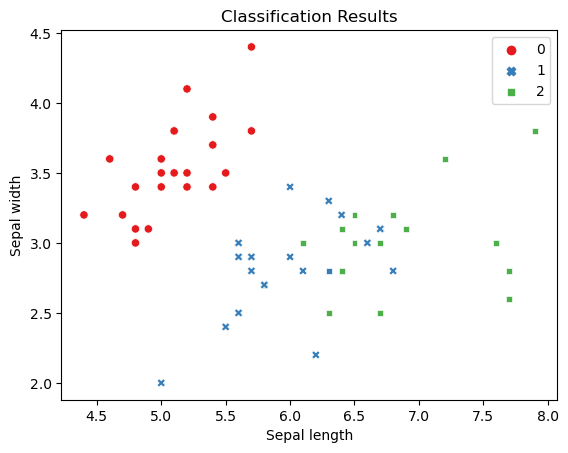

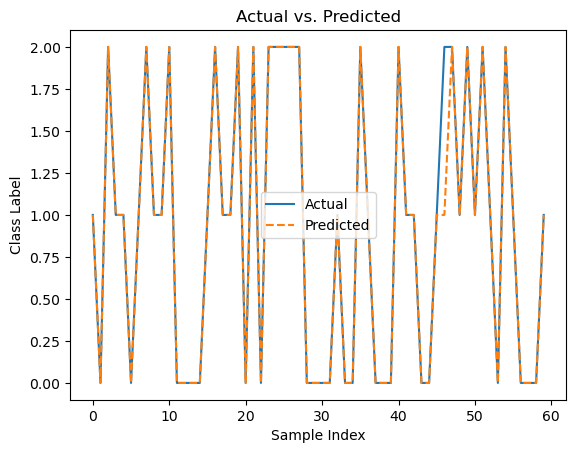

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 创建决策树分类器
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 使用测试集进行预测
y_pred = clf.predict(X_test)

# 计算准确度、精确度、召回率和F1分数
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

# 分类报告
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 混淆矩阵数据表
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:")
print(confusion_matrix)

# 绘制分类结果图
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, style=y_test, palette='Set1', legend='full')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Classification Results')
plt.show()

# 绘制曲线图
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()
